In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



from sklearn.preprocessing import StandardScaler

In [3]:
test = pd.read_csv("./test.csv")

In [4]:
train = pd.read_csv('./train.csv')
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [5]:
#El dataset tiene 40455 filas y 11 columnas
train.shape

(40455, 11)

In [6]:
#Exploro el dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [7]:
#Compruebo si hay valores nulos
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
#Analizo cada categoría
train.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [9]:
train.color.unique()

array(['F', 'E', 'G', 'D', 'J', 'I', 'H'], dtype=object)

In [10]:
train.clarity.unique()

array(['VS2', 'SI2', 'SI1', 'VVS2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [11]:
train.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.006196,0.001098,-0.008829,-0.007112,-0.006420,-0.007766,-0.006926
carat,-0.006196,1.000000,0.025089,0.182590,0.974516,0.950563,0.947930,0.920878
depth,0.001098,0.025089,1.000000,-0.300152,-0.028389,-0.032561,0.091421,-0.000924
table,-0.008829,0.182590,-0.300152,1.000000,0.196031,0.184322,0.150142,0.158128
x,-0.007112,0.974516,-0.028389,0.196031,1.000000,0.973617,0.965597,0.957653
y,-0.006420,0.950563,-0.032561,0.184322,0.973617,1.000000,0.945958,0.934700
z,-0.007766,0.947930,0.091421,0.150142,0.965597,0.945958,1.000000,0.930157
price,-0.006926,0.920878,-0.000924,0.158128,0.957653,0.934700,0.930157,1.000000


<AxesSubplot:title={'center':'Correlation Matrix'}>

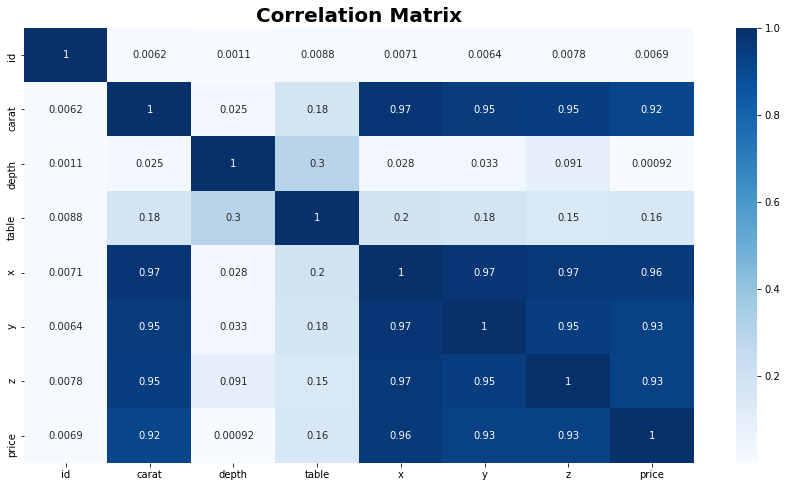

In [12]:
plt.figure(figsize=(15,8))
plt.title('Correlation Matrix', weight='bold').set_fontsize('20')
sns.heatmap(train.corr().abs(), annot=True, cmap = "Blues")

In [13]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [14]:
train.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.50,61.5,58.0,7.32,7.34,4.51,9.588,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2.01,60.6,59.0,8.11,8.25,4.96,9.748,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.50,61.6,57.0,5.13,5.09,3.15,7.255,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.25,61.6,57.0,4.05,4.08,2.50,6.450,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.52,62.0,55.0,5.16,5.19,3.21,7.721,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40455 non-null  int64  
 1   carat          40455 non-null  float64
 2   depth          40455 non-null  float64
 3   table          40455 non-null  float64
 4   x              40455 non-null  float64
 5   y              40455 non-null  float64
 6   z              40455 non-null  float64
 7   price          40455 non-null  float64
 8   cut_Fair       40455 non-null  uint8  
 9   cut_Good       40455 non-null  uint8  
 10  cut_Ideal      40455 non-null  uint8  
 11  cut_Premium    40455 non-null  uint8  
 12  cut_Very Good  40455 non-null  uint8  
 13  color_D        40455 non-null  uint8  
 14  color_E        40455 non-null  uint8  
 15  color_F        40455 non-null  uint8  
 16  color_G        40455 non-null  uint8  
 17  color_H        40455 non-null  uint8  
 18  color_

In [16]:
colum = [i for i in train.columns if i != "price"]
X = train[colum]
y = train["price"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10000)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32364, 27)
(32364,)
(8091, 27)
(8091,)


In [17]:
rdm = RandomForestRegressor()
rdm.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
pred_t = rdm.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, pred_t)

In [20]:
mse

0.008663737500679782

In [21]:
pred_tr = rdm.predict(X_train)

In [22]:
mse1 = mean_squared_error(y_train, pred_tr)

In [23]:
mse1

0.0012730791414874588

In [24]:
#calculo ahora el del dataset completo

In [25]:
rdma = RandomForestRegressor()
rdma.fit(X, y)

RandomForestRegressor()

In [29]:
preda = rdma.predict(X)

In [30]:
msea = mean_squared_error(y, preda)

In [31]:
msea

0.0012164955245507372

In [32]:
preds = rdma.predict(test)

In [33]:
test.head()

,id,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.51,58.3,61.9,5.19,5.20,3.04,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1.02,63.0,58.0,6.37,6.43,4.03,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.59,61.9,56.0,5.39,5.34,3.32,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3,0.90,62.3,56.0,6.14,6.18,3.84,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,2.01,60.2,61.0,8.23,8.16,4.93,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [34]:
test["price"] = preds

In [35]:
c = ["id", "price"]

In [36]:
entrega = test[c]

In [37]:
entrega.head()

,id,price
0,0,7.07975
1,1,8.35321
2,2,7.63638
3,3,8.51912
4,4,9.53003


In [38]:
entrega.to_csv("randomForestRegressor2.csv", header = True, index = False)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10000)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32364, 27)
(32364,)
(8091, 27)
(8091,)


In [18]:
scaler_train = StandardScaler()
scaler_train.fit(X_train)
X_tr_sc = scaler_train.transform(X_train)
X_te_sc = scaler_train.transform(X_test)

In [19]:
rfr = RandomForestRegressor(n_estimators = 3000)
rfr.fit(X_tr_sc , y_train)

KeyboardInterrupt: 

In [46]:
pred_t = rfr.predict(X_te_sc)

In [47]:
mset = mean_squared_error(y_test, pred_t)
mset

0.00856042677545682

In [52]:
test = test.drop(columns=["price"])

In [20]:
scaler_train = StandardScaler()
scaler_train.fit(X)
X_sc = scaler_train.transform(X)
test_sc = scaler_train.transform(test)

In [21]:
rdmat = RandomForestRegressor(n_estimators = 3000)
rdmat.fit(X_sc, y)

RandomForestRegressor(n_estimators=3000)

In [22]:
predat = rdmat.predict(X_sc)

In [23]:
mseal = mean_squared_error(y, predat)
mseal

0.001163856678616263

In [24]:
predss = rdmat.predict(test_sc)

In [25]:
test["price"] = predss

In [26]:
c = ["id", "price"]

In [27]:
entrega2 = test[c]

In [28]:
entrega2.head()

,id,price
0,0,7.080041
1,1,8.352751
2,2,7.651979
3,3,8.510385
4,4,9.528311


In [29]:
entrega2.to_csv("randomForestRegressor3.csv", header = True, index = False)